In [1]:
#In logistic regression, values are >1 are 1 and <1 are 0.

In [2]:
#For logistic regression, apply sigmoid function on linear regression function

In [3]:
#p=1/(1+e^-y)
#ln(p/1-p)=m*x+c

In [4]:
#This curves the graph a bit

In [5]:
#Logistic Regression can only handle binary datasets

In [35]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [36]:
dataset=pd.read_csv('Social_Network_Ads.csv')
dataset

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0
...,...,...,...,...,...
395,15691863,Female,46,41000,1
396,15706071,Male,51,23000,1
397,15654296,Female,50,20000,1
398,15755018,Male,36,33000,0


In [37]:
dataset.isnull().any().any()

False

In [38]:
df=dataset.drop('User ID',axis=1)
df

,Gender,Age,EstimatedSalary,Purchased
0,Male,19,19000,0
1,Male,35,20000,0
2,Female,26,43000,0
3,Female,27,57000,0
4,Male,19,76000,0
...,...,...,...,...
395,Female,46,41000,1
396,Male,51,23000,1
397,Female,50,20000,1
398,Male,36,33000,0


In [39]:
df['Gender'].value_counts()

Female    204
Male      196
Name: Gender, dtype: int64

In [40]:
from sklearn.preprocessing import LabelEncoder
lb=LabelEncoder()
df.iloc[:,0]=lb.fit_transform(df.iloc[:,0])
df

,Gender,Age,EstimatedSalary,Purchased
0,1,19,19000,0
1,1,35,20000,0
2,0,26,43000,0
3,0,27,57000,0
4,1,19,76000,0
...,...,...,...,...
395,0,46,41000,1
396,1,51,23000,1
397,0,50,20000,1
398,1,36,33000,0


In [41]:
from scipy import stats
z=np.abs(stats.zscore(df))
z

array([[1.02020406, 1.78179743, 1.49004624, 0.74593581],
       [1.02020406, 0.25358736, 1.46068138, 0.74593581],
       [0.98019606, 1.11320552, 0.78528968, 0.74593581],
       ...,
       [0.98019606, 1.17910958, 1.46068138, 1.34059793],
       [1.02020406, 0.15807423, 1.07893824, 0.74593581],
       [0.98019606, 1.08359645, 0.99084367, 1.34059793]])

In [43]:
threshold=3
np.where(z>threshold)

(array([], dtype=int64), array([], dtype=int64))

In [44]:
x=df.iloc[:,0:3].values
x

array([[    1,    19, 19000],
       [    1,    35, 20000],
       [    0,    26, 43000],
       ...,
       [    0,    50, 20000],
       [    1,    36, 33000],
       [    0,    49, 36000]], dtype=int64)

In [45]:
y=df.iloc[:,-1].values
y

array([0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0,
       1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0,
       1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1,

In [16]:
#Normalization->Good practice(less variation between independent variables)

In [17]:
#Normalization using standard scalar

In [46]:
from sklearn.preprocessing import StandardScaler

In [47]:
sc=StandardScaler()
x=sc.fit_transform(x)
x

array([[ 1.02020406, -1.78179743, -1.49004624],
       [ 1.02020406, -0.25358736, -1.46068138],
       [-0.98019606, -1.11320552, -0.78528968],
       ...,
       [-0.98019606,  1.17910958, -1.46068138],
       [ 1.02020406, -0.15807423, -1.07893824],
       [-0.98019606,  1.08359645, -0.99084367]])

In [20]:
import joblib
joblib.dump(sc,'transform')

['transform']

In [21]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)

In [22]:
from sklearn.linear_model import LogisticRegression

In [23]:
lr=LogisticRegression()
lr.fit(x_train,y_train)

LogisticRegression()

In [48]:
joblib.dump(lr,"class")

['class']

In [24]:
y_pred=lr.predict(x_test)
y_pred

array([0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1], dtype=int64)

In [25]:
y_test

array([0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1], dtype=int64)

In [26]:
#Accuracy score
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.9125

In [27]:
lr.predict(sc.transform([[0,25,65544]]))

array([0], dtype=int64)

In [28]:
from sklearn.metrics import confusion_matrix

In [29]:
cm=confusion_matrix(y_test,y_pred)
cm

array([[56,  2],
       [ 5, 17]], dtype=int64)

In [30]:
import sklearn.metrics as metrics

In [31]:
fpr,tpr,threshold=metrics.roc_curve(y_test,y_pred)

In [32]:
roc_auc=metrics.auc(fpr,tpr)
roc_auc

0.8691222570532916

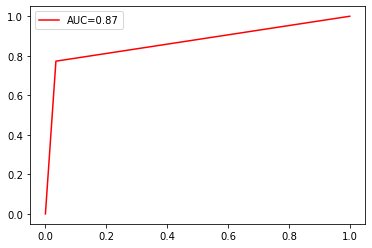

In [33]:
plt.plot(fpr,tpr,label='AUC=%0.2f'%roc_auc,color='r')
plt.legend()

In [34]:
from sklearn.metrics import f1_score
f1_score(y_test,y_pred)

0.8292682926829269